In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import tokenize

import re
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.tsv",sep='\t')
test = pd.read_csv("test.tsv",sep='\t')

In [3]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
train = train.drop(['PhraseId', 'SentenceId'], axis=1)
test = test.drop(['PhraseId', 'SentenceId'], axis=1)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

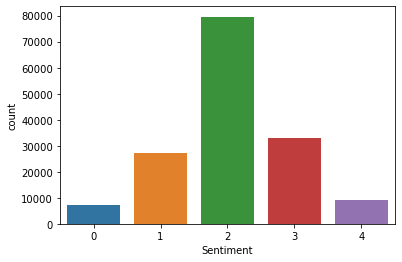

In [6]:
import seaborn as sns
sns.countplot(x='Sentiment',data=train)

In [7]:
train['Phrase']=train.Phrase.apply(lambda x: x.lower())
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [8]:
import contractions

# Expanding contractions
def con(text):
  expand=contractions.fix(text)
  return expand

train['Phrase']=train.Phrase.apply(con)
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [9]:
import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
    
    return text

train['Phrase']=train.Phrase.apply(remove_punc)
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst  s
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [10]:
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
print(stopword_list)

train['Phrase'] = train.Phrase.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
train['Phrase']

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

0         series escapades demonstrating adage good goos...
1           series escapades demonstrating adage good goose
2                                                    series
3                                                          
4                                                    series
                                ...                        
156055                                               hearst
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [11]:
train['Phrase']=train.Phrase.apply(word_tokenize)
train['Phrase']

0         [series, escapades, demonstrating, adage, good...
1         [series, escapades, demonstrating, adage, good...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

In [12]:
#Lemmatizer

lemmatizer=WordNetLemmatizer()
train['Phrase']=train.Phrase.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
train['Phrase']

0         [series, escapade, demonstrating, adage, good,...
1         [series, escapade, demonstrating, adage, good,...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                         [forced, avuncular, chortle]
156057                                 [avuncular, chortle]
156058                                          [avuncular]
156059                                            [chortle]
Name: Phrase, Length: 156060, dtype: object

In [13]:
train['Phrase']=train.Phrase.astype(str)

In [14]:
x = train['Phrase'].values 
y = pd.get_dummies(train['Sentiment']).values

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [16]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(117045,) (117045, 5)
(39015,) (39015, 5)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [18]:
#Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

In [19]:
embed_dim = 128
lstm_out = 196
vocabSize = 2000

model = Sequential()
model.add(Embedding(vocabSize, embed_dim, input_length = 28))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 28, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None
